Import the Following Libraries:

numpy (as np) pandas DecisionTreeClassifier from sklearn.tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

About the Dataset:

Reading data using panda dataframe

In [2]:
my_data = pd.read_csv("loan prediction.csv", delimiter=",")
my_data[0:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Pre Processing:

Removing Rows with Missing Values

In [3]:
my_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
my_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
my_data.isnull().values.any()

False

Using my_data as the loan prediction.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of my_data)

y as the response vector (target)

In [5]:
X = my_data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
X=X.to_numpy()
X

array([['Male', 'Yes', 1.0, ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', 0.0, ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 0.0, ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', 1.0, ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 2.0, ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', 0.0, ..., 360.0, 0.0, 'Semiurban']], dtype=object)

As you may figure out, some features in this dataset are categorical such as Gender or Married. Unfortunately,
Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical
values.

In [6]:
from sklearn import preprocessing
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['Female','Male'])
X[:,0] = le_Gender.transform(X[:,0]) 

In [7]:
from sklearn import preprocessing
le_Married = preprocessing.LabelEncoder()
le_Married.fit(['No','Yes'])
X[:,1] = le_Married.transform(X[:,1]) 

In [8]:
from sklearn import preprocessing
le_Education = preprocessing.LabelEncoder()
le_Education.fit(['Graduate','Not Graduate'])
X[:,3] = le_Education.transform(X[:,3]) 

In [9]:
from sklearn import preprocessing
le_Self_Employed = preprocessing.LabelEncoder()
le_Self_Employed.fit(['No','Yes'])
X[:,4] = le_Self_Employed.transform(X[:,4]) 

In [10]:
from sklearn import preprocessing
le_Property_Area = preprocessing.LabelEncoder()
le_Property_Area.fit(['Urban','Rural','Semiurban'])
X[:,10] = le_Property_Area.transform(X[:,10])

In [11]:
X[0:5]

array([[1, 1, 1.0, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0],
       [1, 1, 0.0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2],
       [1, 1, 0.0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0, 2],
       [1, 0, 0.0, 0, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2],
       [1, 1, 2.0, 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0, 2]],
      dtype=object)

In [12]:
Y= my_data["Loan_Status"]
Y[0:5]

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

Setting up the Decision Tree We will be using train/test split on our decision tree. Let's import train_test_split
from sklearn.cross_validation.

Now train_test_split will return 4 different parameters. We will name them: X_trainset, X_testset, Y_trainset,
Y_testset

The train_test_split will need the parameters: X, Y, test_size=0.3, and random_state=3.

The X and Y are the arrays required before the split, the test_size represents the ratio of the testing dataset,
and the random_state ensures that we obtain the same splits.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3)

Modeling

We will first create an instance of the DecisionTreeClassifier called LoanTree. Inside of the classifier, specify
criterion="entropy" so we can see the information gain of each node.

In [15]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector Y_trainset

In [16]:
LoanTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [17]:
predTree = LoanTree.predict(X_testset)


We can print out predTree and Y_testset if we want to visually compare the prediction to the actual values.

In [18]:
print (predTree [0:5])
print (Y_testset [0:5])

['Y' 'Y' 'Y' 'Y' 'N']
212    Y
194    Y
529    Y
205    Y
54     N
Name: Loan_Status, dtype: object


Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.7708333333333334


Visualization

Lets visualize the tree

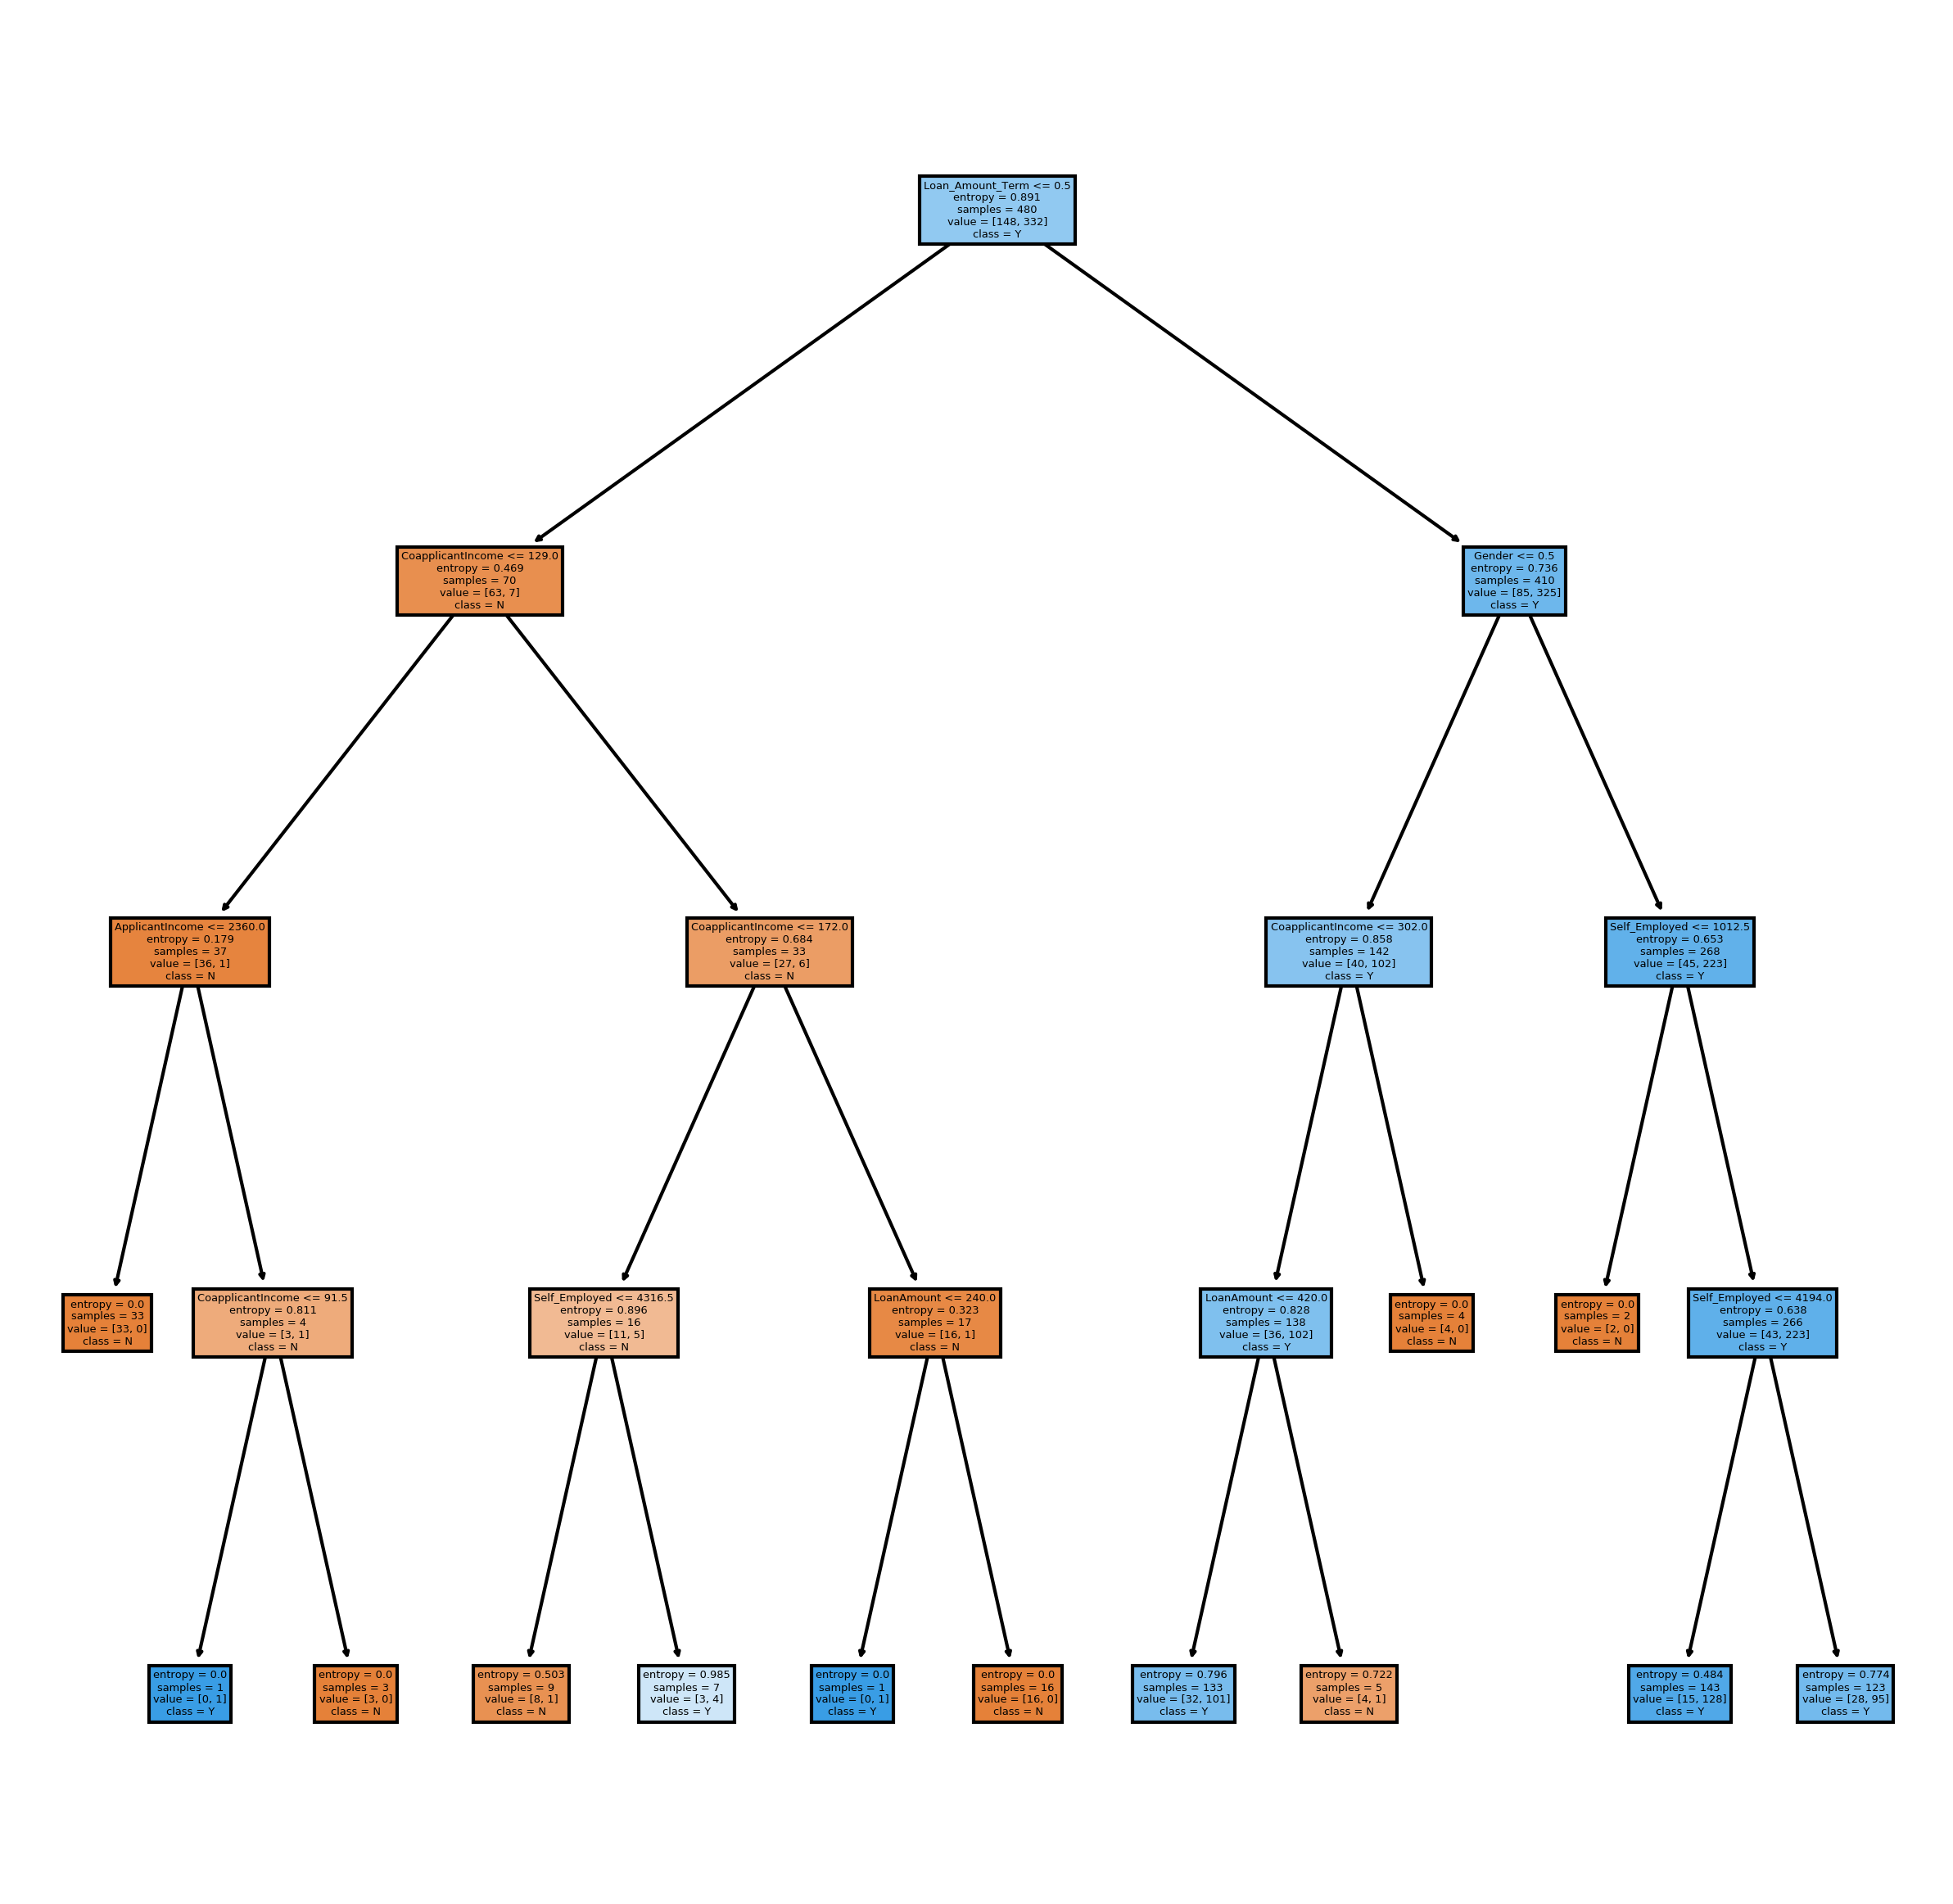

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Make an instance of the Model
fn=my_data.columns[0:11]
cn= my_data["Loan_Status"].unique().tolist()
LoanTree.fit(X, Y)
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(LoanTree,
 feature_names = fn,
 class_names=cn,
 filled = True);